In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
#import bioinfokit 
from bioinfokit import analys, visuz

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

## my own function that gets the data
from Pi_GetData_fcn import GetData as GetData
from Pi_GetPiOverview_fcn import GetPiOverview as GetPiOverview


In [2]:
# define function
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same')/w

## What this script does:

    - it loads the pi data with the GetData function 
        - in that function it:
            1. shifts the window position so that it applies to the whole genome and not chromosome position
            2. all samples are joined in one data frame 
            3. there is df_shiftRaw with the raw data for %-window covered and pi per window
            4. there is also df_shiftNorm with the window pi multiplied with the frac
    - it calculated genome-wide pi values either with the raw data or normaliued data
        1. pi: uses the raw data
        2. piNorm: using the df_shiftNorm data 
        2. piNormwNaN: the final value is multiplied with the fraction of windows that are not nan

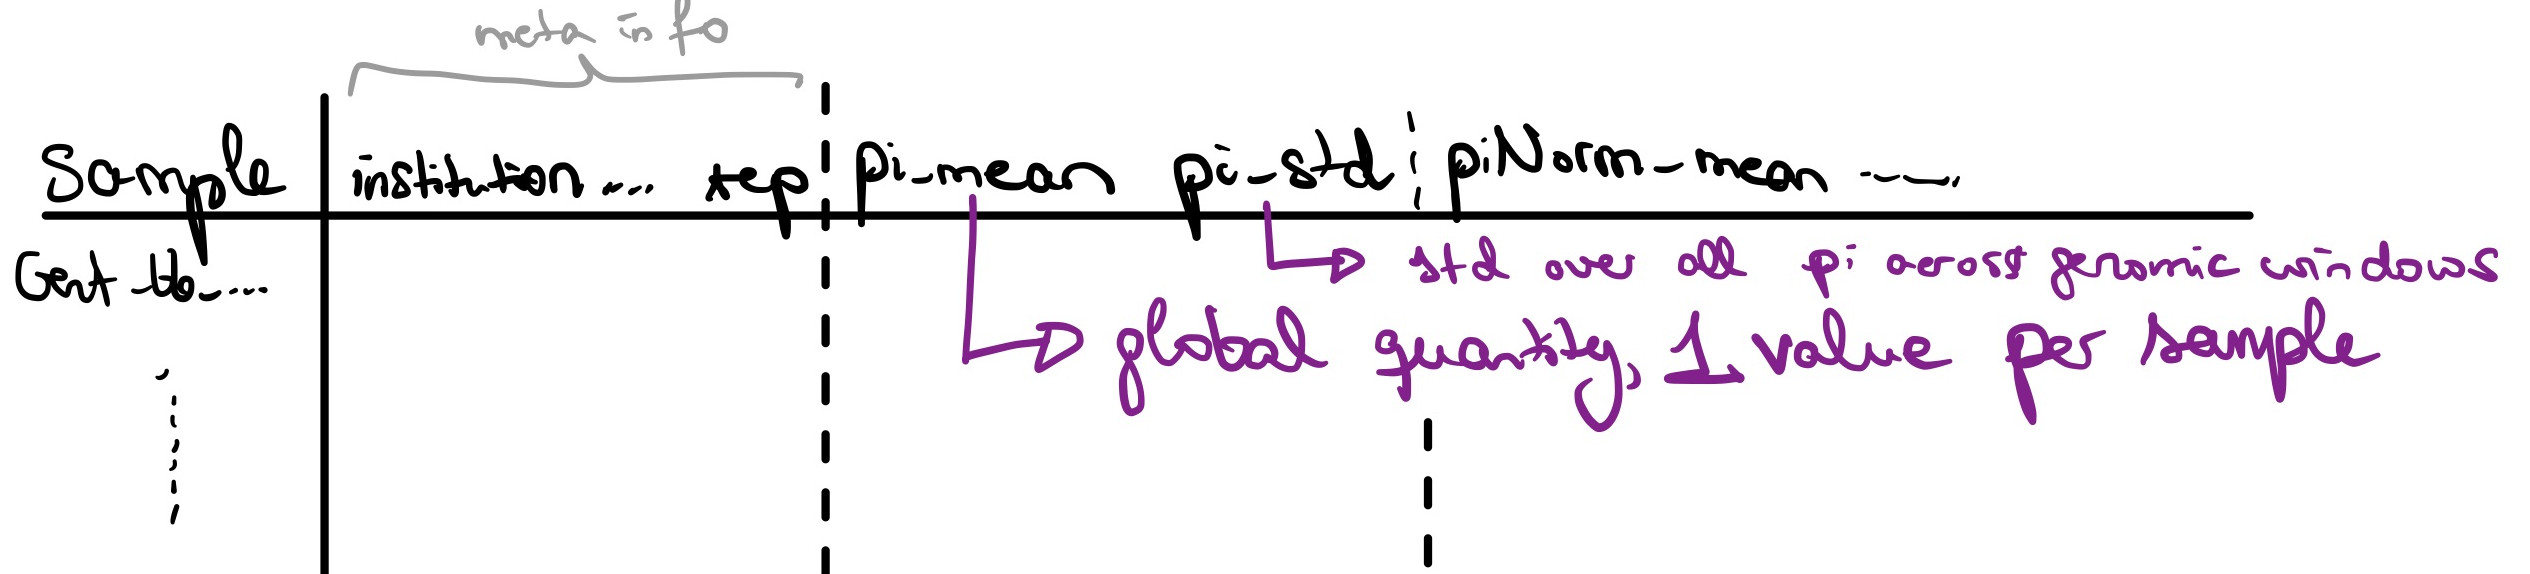

In [3]:
# read in data to panda

InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/defaultSet_500Cov/fractioncov_default/"
#InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/defaultSet_500Cov/fractioncov_0.01/"
files=glob.glob(InPath+"*.pi")

outPath = "/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/"

chromosomes=["NC_003279.8","NC_003280.10","NC_003281.10","NC_003282.8","NC_003283.11","NC_003284.9","NC_001328.1"]
chromosomes_end = [1.50750e+07, 3.03500e+07, 4.41350e+07, 6.16300e+07, 8.25550e+07, 1.00270e+08, 1.00285e+08]

len(files)

91

In [4]:
## use the function to get the data 
samName_collect, df_shiftRaw, df_shiftNorm, collect_NanNum = GetData(files, chromosomes, chromosomes_end, True)
overview = GetPiOverview(samName_collect, df_shiftRaw, df_shiftNorm, collect_NanNum)

overview["NumNaNWindows"] =  collect_NanNum
overview

,ID,institution,treatment,inst_treat,week,rep,pi_mean,pi_std,piNorm_mean,piNorm_std,piNormwNaN_mean,piNormwNaN_std,NumNaNWindows
pi_VU_bn50_15_3_maxCov500.pi,VU_bn50_15_3,VU,bn50,VU_bn50,15,3,0.001781,0.003267,0.001765,0.003232,0.001764,0.003229,11.0
pi_VU_bn50_0_5_maxCov500.pi,VU_bn50_0_5,VU,bn50,VU_bn50,0,5,0.001697,0.003283,0.001673,0.003207,0.001671,0.003202,16.0
pi_RUG_bb_15_5_maxCov500.pi,RUG_bb_15_5,RUG,bb,RUG_bb,15,5,0.001743,0.003150,0.001729,0.003119,0.001727,0.003114,14.0
pi_Gent_bb_15_3_maxCov500.pi,Gent_bb_15_3,Gent,bb,Gent_bb,15,3,0.001737,0.003193,0.001722,0.003157,0.001720,0.003153,12.0
pi_NIOO_A00_1_2_maxCov500.pi,NIOO_A00_1_2,NIOO,A00,NIOO_A00,1,2,0.001695,0.003185,0.001667,0.003126,0.001664,0.003120,18.0
pi_UVA_anc_0_3_maxCov500.pi,UVA_anc_0_3,UVA,anc,UVA_anc,0,3,0.001746,0.003251,0.001732,0.003215,0.001730,0.003211,14.0
pi_NIOO_A00_1_5_maxCov500.pi,NIOO_A00_1_5,NIOO,A00,NIOO_A00,1,5,0.001681,0.003211,0.001639,0.003114,0.001634,0.003105,27.0
pi_NIOO_bb_15_3_maxCov500.pi,NIOO_bb_15_3,NIOO,bb,NIOO_bb,15,3,0.001672,0.003255,0.001622,0.003119,0.001613,0.003101,57.0
pi_Gent_bb_1_1_maxCov500.pi,Gent_bb_1_1,Gent,bb,Gent_bb,1,1,0.001598,0.002997,0.001578,0.002949,0.001564,0.002922,92.0
pi_WUR_bb_15_3_maxCov500.pi,WUR_bb_15_3,WUR,bb,WUR_bb,15,3,0.001682,0.003163,0.001669,0.003130,0.001667,0.003126,11.0


In [5]:

#the fields that we are interested in: 
samName_collect_freq = ["freq_"+s for s in samName_collect]
threshold = 0.6

df_shiftRaw_threshold = df_shiftRaw.copy()

print(df_shiftRaw_threshold.isna().sum().sum())


for i in range(len(samName_collect)):
    column = df_shiftRaw_threshold[samName_collect_freq[i]].values

    #print(np.sum(np.isnan(column)))
    column_new = np.where(column<= threshold, np.nan, column)
    #print(np.sum(np.isnan(column_new)))
    df_shiftRaw_threshold[samName_collect_freq[i]] = column_new


print(df_shiftRaw_threshold.isna().sum().sum())

6338
12685


In [6]:
## use the function to get the data from the thresholded data frame

## now get the df where the pi and freq are multiplied per window
df_shiftNorm_threshold = df_shiftRaw_threshold[["chr","window"]]
collect_NanNum_threshold = np.zeros(len(samName_collect))

## loop over all sample names and add the columns that have the normalized pi value
for i in range(len(samName_collect)):    
    nameHere = samName_collect[i]
    normPi = np.array(df_shiftRaw_threshold["freq_" + nameHere].values)*np.array(df_shiftRaw_threshold["pi_" + nameHere].values)
    df_shiftNorm_threshold["piNorm_" + nameHere] = normPi
    df_shiftNorm_threshold

    collect_NanNum_threshold[i] = sum(np.isnan(normPi))


overview_threshold = GetPiOverview(samName_collect, df_shiftRaw_threshold, df_shiftNorm_threshold, collect_NanNum_threshold)

overview_threshold["NumNaNWindows"] =  collect_NanNum_threshold
overview_threshold

,ID,institution,treatment,inst_treat,week,rep,pi_mean,pi_std,piNorm_mean,piNorm_std,piNormwNaN_mean,piNormwNaN_std,NumNaNWindows
pi_VU_bn50_15_3_maxCov500.pi,VU_bn50_15_3,VU,bn50,VU_bn50,15,3,0.001781,0.003267,0.001765,0.003232,0.001764,0.003229,11.0
pi_VU_bn50_0_5_maxCov500.pi,VU_bn50_0_5,VU,bn50,VU_bn50,0,5,0.001697,0.003283,0.001673,0.003207,0.001671,0.003202,16.0
pi_RUG_bb_15_5_maxCov500.pi,RUG_bb_15_5,RUG,bb,RUG_bb,15,5,0.001743,0.003150,0.001729,0.003119,0.001727,0.003114,14.0
pi_Gent_bb_15_3_maxCov500.pi,Gent_bb_15_3,Gent,bb,Gent_bb,15,3,0.001737,0.003193,0.001722,0.003157,0.001720,0.003153,12.0
pi_NIOO_A00_1_2_maxCov500.pi,NIOO_A00_1_2,NIOO,A00,NIOO_A00,1,2,0.001695,0.003185,0.001667,0.003126,0.001664,0.003120,18.0
pi_UVA_anc_0_3_maxCov500.pi,UVA_anc_0_3,UVA,anc,UVA_anc,0,3,0.001746,0.003251,0.001732,0.003215,0.001730,0.003211,14.0
pi_NIOO_A00_1_5_maxCov500.pi,NIOO_A00_1_5,NIOO,A00,NIOO_A00,1,5,0.001681,0.003211,0.001639,0.003114,0.001634,0.003105,27.0
pi_NIOO_bb_15_3_maxCov500.pi,NIOO_bb_15_3,NIOO,bb,NIOO_bb,15,3,0.001672,0.003255,0.001622,0.003119,0.001613,0.003101,57.0
pi_Gent_bb_1_1_maxCov500.pi,Gent_bb_1_1,Gent,bb,Gent_bb,1,1,0.001598,0.002997,0.001578,0.002949,0.001564,0.002922,92.0
pi_WUR_bb_15_3_maxCov500.pi,WUR_bb_15_3,WUR,bb,WUR_bb,15,3,0.001682,0.003163,0.001669,0.003130,0.001667,0.003126,11.0


<Axes: xlabel='NumNaNWindows', ylabel='pi_mean'>

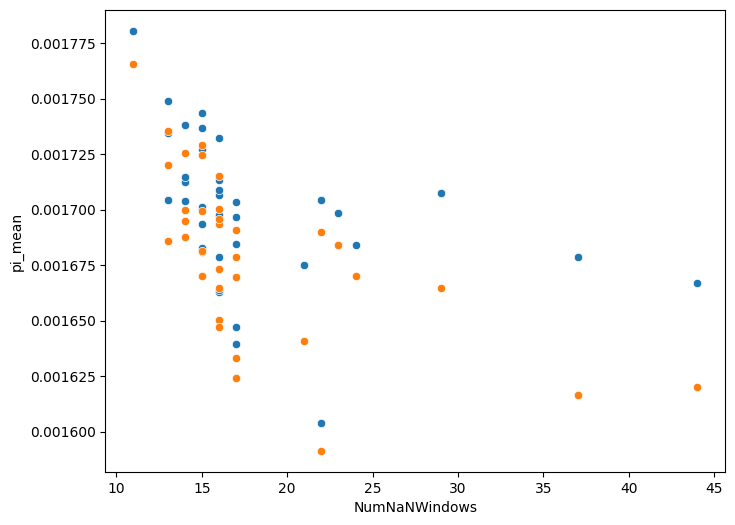

In [7]:
# what is the impact of the number of windows that we have to ignore?

fig2, ax2 = plt.subplots(figsize=(8,6))
sns.scatterplot(overview[overview["institution"]=="VU"], x="NumNaNWindows",y="pi_mean", ax=ax2)
sns.scatterplot(overview[overview["institution"]=="VU"], x="NumNaNWindows",y="piNorm_mean", ax=ax2)
#sns.scatterplot(overview, x="NumNaNWindows",y="piNormwNaN_mean", ax=ax2)

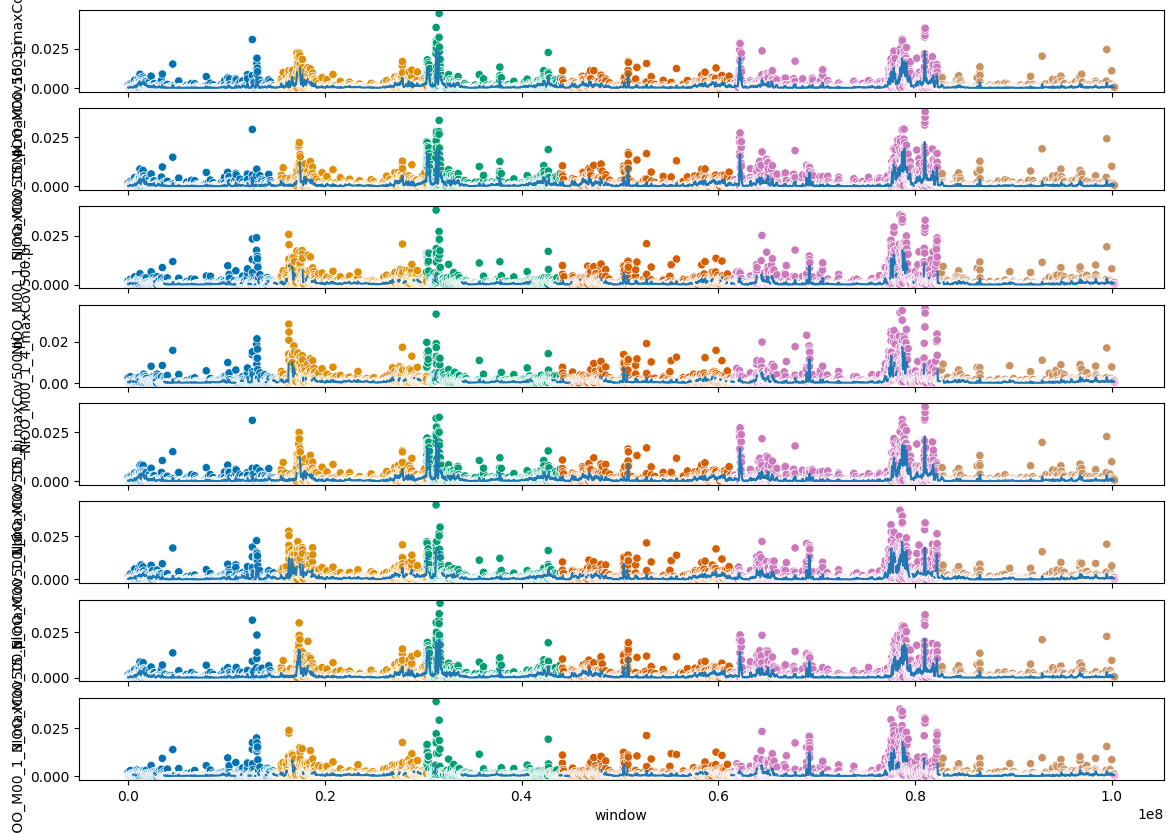

In [8]:
samName_plot = [s for s in samName_collect if "NIOO_M00" in s]

f1, axx = plt.subplots(len(samName_plot),1, sharex='col', figsize=(14, 10))#, sharex=True)
windowSize=10

for i in range(len(samName_plot)):
    plot = sns.scatterplot(ax=axx[i], data=df_shiftNorm, x='window', y="piNorm"+"_"+samName_plot[i], 
                   hue='chr', palette = 'colorblind', legend=None) 
    axx[i].set_ylabel(samName_plot[i])
    movmean = moving_average(df_shiftNorm["piNorm"+"_"+samName_plot[i]], windowSize)
    axx[i].plot(np.array(df_shiftNorm['window'].values),movmean)


In [9]:
# only look at backbone
overviewBB = overview.loc[(overview['treatment']=="bb") | (overview['treatment']=="anc")]
overviewnotBB = overview.loc[(overview['treatment']!="bb") | (overview['treatment']=="anc")]
overviewW0 = overview.loc[(overview['week']==0)]
overviewW1 = overview.loc[(overview['week']==1)]
overviewW15 = overview.loc[(overview['week']==15)]

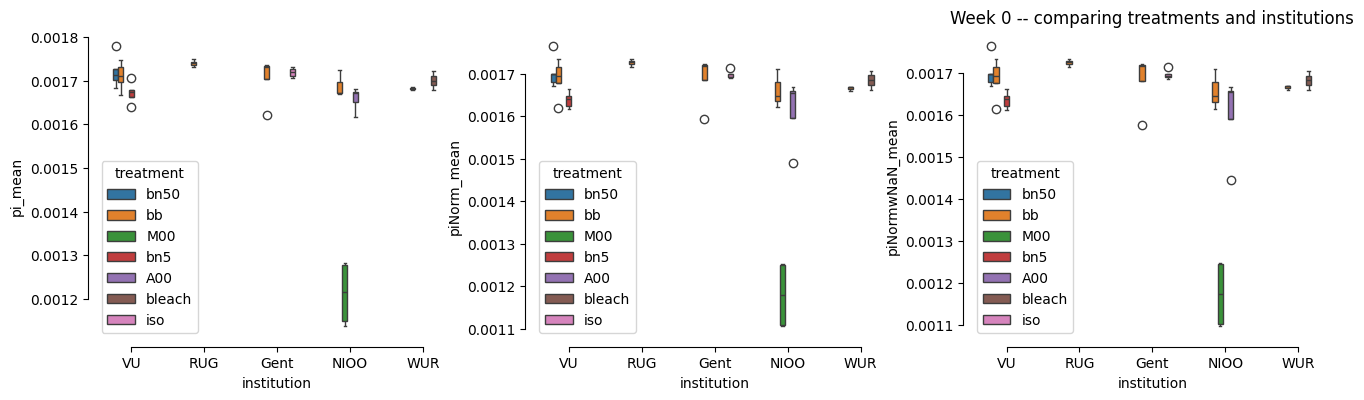

In [10]:
## hypothesis: different treatments start out with different diversity from the start:

fig1, ax1 = plt.subplots(1,3, figsize=(16,4))
plt.title('Week 0 -- comparing treatments and institutions')
sns.boxplot(data=overviewW15, x="institution", y="pi_mean", hue="treatment", width=0.5, ax=ax1[0])
#sns.move_legend(ax1[0], "upper left", bbox_to_anchor=(1, 1))
sns.boxplot(data=overviewW15, x="institution", y="piNorm_mean", hue="treatment", width=0.5, ax=ax1[1])
sns.boxplot(data=overviewW15, x="institution", y="piNormwNaN_mean", hue="treatment", width=0.5, ax=ax1[2])

#sns.move_legend(ax1[1], "upper left", bbox_to_anchor=(1, 1))

sns.despine(offset=5, trim=True)


In [13]:
### save the data:

overview.to_pickle(outPath + "PiDiversity_singleData_20240527.pkl")
overview_threshold.to_pickle(outPath + "PiDiversity_threshold0.6_singleData_20240527.pkl")

overview.to_csv(outPath + "PiDiversity_singleData_20240527.csv", index=False)
overview_threshold.to_csv(outPath + "PiDiversity_threshold0.6_singleData_20240527.csv", index=False)

In [15]:
outPath


'/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/1_Dev_PipelineCelegans/Pi_Diversity/O_output/'

In [80]:
a

[1, 2, 7, 2]